In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats, scipy.special

import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
%matplotlib inline


# Make the axes better
plt.rcParams['xtick.minor.visible'], plt.rcParams['xtick.top'] = True,True 
plt.rcParams['ytick.minor.visible'], plt.rcParams['ytick.right'] = True,True 
plt.rcParams['xtick.direction'], plt.rcParams['ytick.direction'] = 'in','in'

# Make the font look nicer
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{txfonts}"
plt.rcParams['font.size'] = 18 

In [2]:

plt.rcParams['font.size'] = 18 

#needed for a widget®
range_slider = widgets.FloatRangeSlider(
    value=[0., +1.],
    min=-4., max=+4., step=0.2,
    description='a,b:',
    readout_format='.1f',
)


# RISE:
This notebook uses RISE to give a slideshow (which needs to beinstalled as a python package)

The controls are: 

alt-r to start

space to go forwards

shift-space to go backwards

The usual commands to run cells

### A warning for downloaders: The figures in the markdown blocks are generated by the later code, so will not appear when run for the first time.

# Common pdfs

This notebook shows examples of some of the most common useful pdfs, which you will come across during the course (and during astrophysics research).

### See also: Section 3.3 in Ivezić et al.

In [3]:
# Scipy offers pdfs of many of these

useScipy = False

# Uniform distribution

$
\begin{array}{l}{X \sim \mathrm{U}(a, b) \text { where }-\infty<a<b<+\infty} \\ {f(x ; a, b)=\left\{\begin{array}{ll}{1 /(b-a)} & {\text { if } a \leq x \leq b} \\ {0} & {\text { otherwise }}\end{array}\right.} \\ {\mathrm{E}[X]=(a+b) / 2} \\ {\operatorname{Var}[X]=(b-a)^{2} / 12}\end{array}
$
![](./ExampleUniformDistribution.png)


In [4]:
def Uniform(a,b,x) :
    '''pdf of uniform distribution between a & b, evaluated at x'''
    mask = (x>=a) & (x<=b)
    f = np.zeros_like(x)
    if b != a :
        f[mask] = 1./(b-a)
    return f

def plotUniform(a,b,ax,label=None) :
    '''Plot pdf of uniform distribution between a & b, evaluated at x'''
    x = np.linspace(-4,4,600)
    plt.xlim(-4,4)
    plt.ylim(0,1.7)
    plt.ylabel('f(x)')
    plt.xlabel('x')
    # alternative: 
    if useScipy :
        RV = scipy.stats.uniform(a,b-a)
        ax.plot(x, RV.pdf(x),label=label)
    else : 
        ax.plot(x, Uniform(a,b,x),label=label)


In [6]:


def plotUniformWidget(range_slider=range_slider):
    '''plot pdf of uniform distribution using range slider'''
    a = range_slider[0]
    b = range_slider[1]
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    plotUniform(a,b,ax)

    
widgets.interact(plotUniformWidget,range_slider=range_slider);

interactive(children=(FloatRangeSlider(value=(-4.0, 4.0), description='a,b:', max=4.0, min=-4.0, readout_forma…

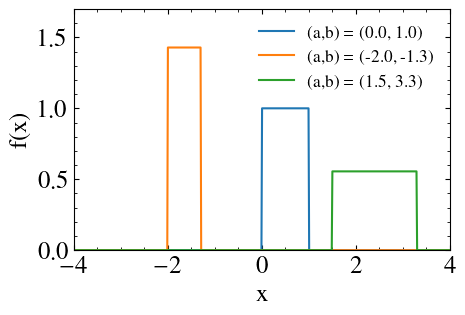

In [7]:

avals = [0,-2,1.5]
bvals = [1,-1.3,3.3]
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
for a,b in zip(avals,bvals) :
    plotUniform(a,b,ax,'(a,b) = (%.1f, %.1f)' % (a,b))
plt.legend(loc='upper right', frameon=False, fontsize='x-small')
plt.tight_layout()
plt.savefig('ExampleUniformDistribution.png',format='png')
plt.show()


Note: $\mathrm{U}(0,1)$ is the **standard uniform distribution**

Example in astronomy: Often used when we want to avoid favouring one possibility over another, e.g. as a prior in Bayesian reasoning:

${P(\mathrm{age}/\mathrm{Gyr}) = \left\{\begin{array}{ll}{1 /13.8} & {\text { if } 0 \leq  \mathrm{age}/\mathrm{Gyr} \leq 13.8} \\ {0} & {\text { otherwise }}\end{array}\right.} $  

Sometimes we have an unknown **scale parameter** $\sigma$ where we don't know the order of magnitude of the variable, such as the atmospheric mass fraction of an exoplanet. In this case, we may take the logarithm of $\sigma$ to be distributed uniformly (an example of a **Jeffreys prior**).

# Beta distribution

$
\begin{array}{l}{X \sim \operatorname{Beta}(\alpha, \beta) \text { where } \alpha>0 \text { and } \beta>0} \\ {f(x ; \alpha, \beta)=\left\{\begin{array}{ll}{\frac{1}{B(\alpha, \beta)} x^{\alpha-1}(1-x)^{\beta-1}} & {\text { if } 0 \leq x \leq 1}\\ {0} & {\text { otherwise }}\end{array}\right.}\\ {\mathrm{E}[X]=\frac{\alpha}{\alpha+\beta}}; \quad {\operatorname{Var}[X]=\frac{\alpha \beta}{(\alpha+\beta)^{2}(\alpha+\beta+1)}}\end{array}
$


$
\begin{array}{l}{\text { Remarks: }} \\ {\bullet B(\alpha, \beta)=\frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha+\beta)}} {\quad \text { is the beta function }} \\ {\bullet \Gamma(n)=(n-1) !}\end{array}
$

![](./ExampleBetaDistribution.png)


In [8]:
def Beta(alpha, beta, x) :
    '''pdf of beta distribution with parameters alpha & beta, evaluated at x'''
    f = np.zeros_like(x)
    mask = (x>0) & (x<1)
    Betaalphabeta = scipy.special.gamma(alpha) * scipy.special.gamma(beta) / scipy.special.gamma(alpha+beta)
    f[mask] = x[mask]**(alpha-1) * (1.-x[mask])**(beta-1) / Betaalphabeta
    return f


def plotBeta(alpha, beta,ax,label=None):
    '''plot pdf of beta distribution with parameters alpha & beta, evaluated at x'''
    x = np.linspace(0.0001,0.9999,100)
    if useScipy :
        RV = scipy.stats.beta(a=alpha,b=beta)
        ax.plot(x, RV.pdf(x),label=label)
    else :
        ax.plot(x, Beta(alpha,beta,x),label=label)
    plt.xlim(0,1)
    plt.ylim(0,8.5)
    plt.ylabel('f(x)')
    plt.xlabel('x')

In [9]:
def plotBetaWidget(alpha=0.5, beta = 0.5):
    '''plot pdf of beta distribution with parameters alpha & beta, evaluated at x - for widget'''
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    plotBeta(alpha, beta,ax)
    
widgets.interact(plotBetaWidget,alpha=(0.,6.,0.1), beta=(0.,6.,0.1));
    

interactive(children=(FloatSlider(value=0.5, description='alpha', max=6.0), FloatSlider(value=0.5, description…

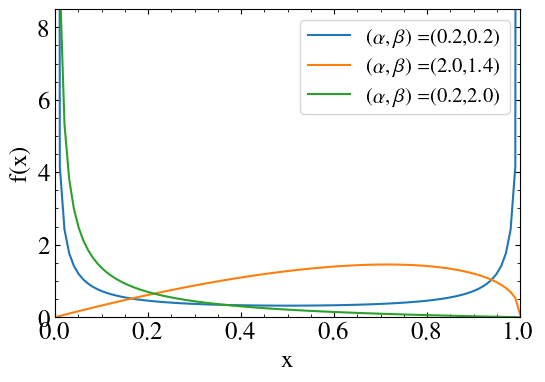

In [9]:

alphavals = [0.2,2,0.2]
betavals = [0.2,1.4,2]
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for a,b in zip(alphavals,betavals) :
    plotBeta(a,b,ax,r'$(\alpha,\beta)=$(%.1f,%.1f)' % (a,b))
plt.legend(fontsize='small')
plt.savefig('./ExampleBetaDistribution.png',format='png')
plt.show()

Note that as $x\rightarrow 0$, Beta$(\alpha,\beta)\propto x^{(\alpha-1)}$, and as  $x\rightarrow 1$, Beta$(\alpha,\beta)\propto x^{(\beta-1)}$

Examples in astronomy: 
 - The distribution of planet eccentricities? (See Project 2)
 - Continuous variables restricted to a finite interval, e.g. posterior estimates for the occurrence fraction of a type of object (such as binary stars) $\in[0,1]$.

# Normal (Gaussian) distribution

$
\begin{array}{l}{X \sim \mathrm{N}\left(\mu, \sigma^{2}\right) \text { where }-\infty<\mu<+\infty \text { and } \sigma^{2}>0} \\ {f(x ; \mu, \sigma)=\frac{1}{\sigma \sqrt{2 \pi}} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right), \quad-\infty<x<+\infty} \\ {\mathrm{E}[X]=\mu} \\ {\operatorname{Var}[X]=\sigma^{2}}\end{array}
$

![](./ExampleNormalDistribution.png)

In [10]:
def Normal(mu,sigma,x) :
    '''pdf of Normal distribution with parameters mu & sigma, evaluated at x'''
    return np.exp(-0.5*(x-mu)**2/sigma**2)/(sigma*np.sqrt(2.*np.pi))



def plotNormal(mu, sigma, ax, label=None):
    '''plot pdf of Normal distribution with parameters mu & sigma'''
    x = np.linspace(-5,5,100)
    plt.xlim(-5,5)
    plt.ylim(0,1.)
    if useScipy :
        RV = scipy.stats.norm(loc=mu,scale=sigma)
        ax.plot(x, RV.pdf(x),label=label)
    else :
        ax.plot(x, Normal(mu,sigma,x),label=label)
    plt.ylabel('f(x)')
    plt.xlabel('x')


In [11]:
def plotNormalWidget(mu=0., sigma = 1.):
    '''plot pdf of Normal distribution with parameters mu & sigma - for widget'''
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    plotNormal(mu,sigma,ax)
 
    
widgets.interact(plotNormalWidget,mu=(-5.,5.), sigma=(0.001,3.)); 

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0), FloatSlider(value=1.0, desc…

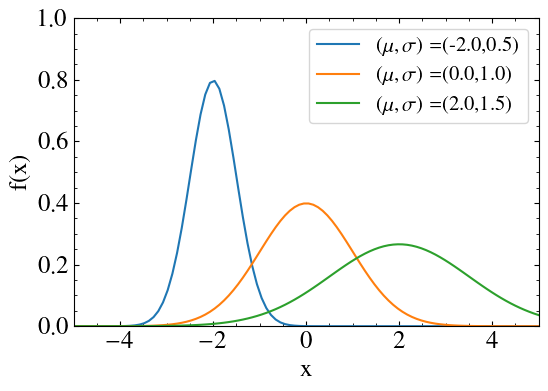

In [13]:

muvals = [-2,0,2]
sigmavals = [0.5,1,1.5]
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for m,s in zip(muvals,sigmavals) :
    plotNormal(m,s,ax,r'$(\mu,\sigma)=$(%.1f,%.1f)' % (m,s))
plt.legend(fontsize='small')
plt.savefig('ExampleNormalDistribution.png',format='png')

plt.show()

$\sigma$ is the standard deviation.

N(0,1) is the **standard normal distribution.**

In a Bayesian context, the normal distribution best represents our state of knowledge if we know nothing about a distribution except for its mean and variance.

Example in astronomy: So, so many things.

Above all: Observational uncertainties are usually assumed to be be Gaussian, so, for a true value $x$ with observational uncertainty $\sigma_x$, one expects to find observed values $x_{\rm obs} \sim N(x,\sigma_x)$.

Arises in the **central limit theorem** (crudely, distributions become Gaussian under certain conditions as the sample size increases)

NB also the **lognormal distribution** where the logarithm of a variable is normally distributed. Often used to describe distributions over several orders of magnitude, such as the masses of objects.

# $\chi^2$ (chi-squared) distribution

$
\begin{array}{l}{X \sim \chi^{2}(v) \\ \text { where } v \text { is a positive integer (number of degrees of freedom) }} \\ {f(x ; v)=\frac{(1 / 2)^{v / 2}}{\Gamma(v / 2)} x^{v / 2-1} \exp (-x / 2), \quad 0 \leq x<\infty}\\ {\mathrm{E}[X]=\nu} \\ {\operatorname{Var}[X]=2\nu}\end{array}
$

![](./ExampleChi2Distribution.png)

In [12]:
def ChiSquared(nu, x) :
    '''pdf of Chi squared distribution with parameter nu, evaluated at x'''
    f = np.zeros_like(x)
    mask = x>=0
    f[mask] = 0.5**(0.5*nu) * x[mask]**(0.5*nu-1) * np.exp(-0.5*x[mask]) \
                / scipy.special.gamma(0.5*nu)
    return f


def plotChiSquared(nu,ax,label=None):
    '''plot pdf of Chi squared distribution with parameter nu'''
    x = np.linspace(0.001,10,100)
    plt.xlim(0,10)
    plt.ylim(0,1.)
    if useScipy :
        RV = scipy.stats.chi2(df=nu)
        ax.plot(x, RV.pdf(x),label=label)
    else :
        ax.plot(x, ChiSquared(nu,x),label=label)
    plt.ylabel('f(x)')
    plt.xlabel('x')



In [14]:

def plotChiSquaredWidget(nu=5.):
    '''plot pdf of Chi squared distribution with parameter nu - for widget'''
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    plotChiSquared(nu,ax)

    
    
    
widgets.interact(plotChiSquaredWidget,nu=(1.,10.,1));

interactive(children=(FloatSlider(value=5.0, description='nu', max=10.0, min=1.0, step=1.0), Output()), _dom_c…

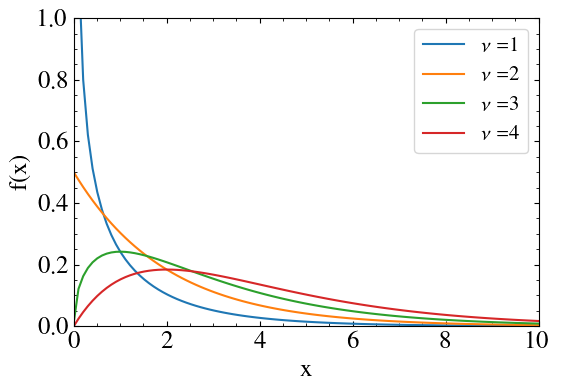

In [15]:
nuvals = [1,2,3,4]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for n in nuvals :
    plotChiSquared(n,ax,r'$\nu=$%d' % n)
plt.legend(fontsize='small')
plt.savefig('ExampleChi2Distribution.png',format='png')

plt.show()


### The chi-squared distribution is important because the sum of squares of $\nu$ independant Gaussian random variables has this distribution. We show this with a simple numerical experiment below.

Example in astronomy: Used in "chi-squared tests" when fitting model parameters - to be discussed later in the course

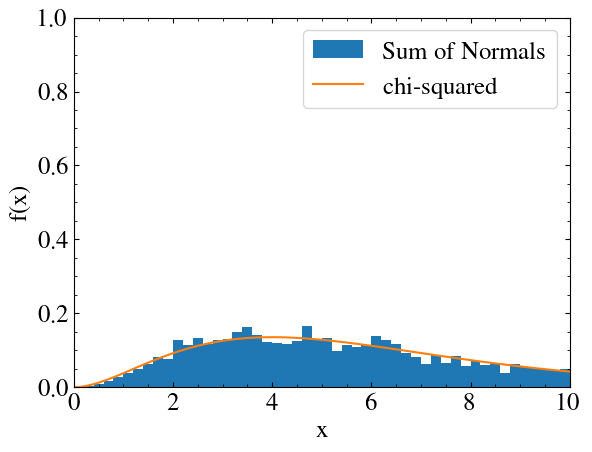

In [16]:
# Sum of nu normal distributions squared
nu = 6
nSamples = 2000

for i in range(nu) :
    # Same random numbers from Gaussian, and sum their squares
    SumOfNormalsSquared = np.sum(np.random.randn(nSamples,nu)**2, axis=1)

binwidth = 0.2
plt.hist(SumOfNormalsSquared,np.arange(0,np.max(SumOfNormalsSquared)+binwidth,binwidth),
         density=True,label='Sum of Normals')
plotChiSquared(nu,plt.gca(),label='chi-squared')
plt.legend()

plt.show()

# Exponential distribution

$$
\begin{array}{ll}{X \sim \operatorname{Exp}(\lambda) \text { where } \lambda>0} \\ {f(x ; \lambda)=\left\{\begin{array}{ll}{\lambda \exp (-\lambda x)} & {\text { if } x \geq 0,} \\ {0} & {\text { otherwise. }}\end{array} \quad(0 \leq x<\infty)\right.}\\ {\mathrm{E}[X]=\lambda^{-1}} \\ {\operatorname{Var}[X]=\lambda^{-2}}\end{array}
$$

![](./ExampleExponentialDistribution.png)

In [17]:
def Exponential(lambdaIn, x) : # Note that lambda is a keyword in python so can't be used as a variable name
    '''pdf of Exponential distribution with parameter lambdaIn, evaluated at x'''
    f = np.zeros_like(x)
    mask = x>=0
    f[mask] = lambdaIn*np.exp(-lambdaIn*x[mask])
    return f

def plotExponential(lambdaIn,ax,label=None):
    '''plot pdf of Exponential distribution with parameter lambdaIn'''
    x = np.linspace(0,3,100)
    plt.xlim(0,3.)
    plt.ylim(0,5.)
    if useScipy :
        RV = scipy.stats.expon(scale=1./lambdaIn)
        ax.plot(x, RV.pdf(x),label=label)
    else :
        ax.plot(x, Exponential(lambdaIn,x),label=label)
    plt.ylabel('f(x)')
    plt.xlabel('x')

In [18]:
def plotExponentialWidget(lambdaIn=5.):
    '''plot pdf of Exponential distribution with parameter lambdaIn - for widget'''
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    plotExponential(lambdaIn,ax)

    
widgets.interact(plotExponentialWidget,lambdaIn=(0.,10.,0.2));

interactive(children=(FloatSlider(value=5.0, description='lambdaIn', max=10.0, step=0.2), Output()), _dom_clas…

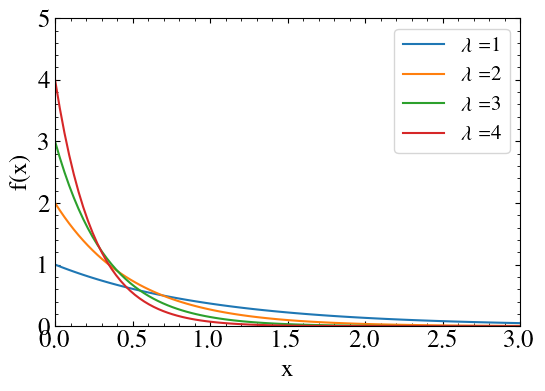

In [19]:
lambdavals = [1,2,3,4]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for n in lambdavals :
    plotExponential(n,ax,r'$\lambda=$%d' % n)
plt.legend(fontsize='small')
plt.savefig('ExampleExponentialDistribution.png',format='png')

plt.show()


Related to the **Laplace distribution**, which is a double sided exponential distribution
$\lambda/2 \exp(-\lambda|x|)$.

Examples in astronomy: 
 - Location of particles in an atmosphere 
 - Waiting times between events of a Poisson process (X-rays hitting your detector, SNe going off in your survey FoV,...)
 
In a Bayesian context, the exponential distribution also best describes our knowledge of a variable if all we know is its mean.

# Gamma distribution

$
\begin{array}{l}{X \sim \operatorname{Gamma}(\alpha, \beta) \text { where } \alpha>0 \text { and } \beta>0} \\ {f(x ; \alpha, \beta)=\frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha-1} \exp (-\beta x), \quad 0 \leq x<\infty} \\ {\mathrm{E}[X]=\alpha / \beta} \\ {\operatorname{Var}[X]=\alpha / \beta^{2}}\end{array}
$

![](./ExampleGammaDistribution.png)

The Gamma distribution is a general case which includes the chi-squared and exponential distributions as special cases.

Gammma$(k/2,1/2) = \chi^2(k)$

Gamma$(1,\lambda) = \mathrm{Exp}(\lambda)$

In [21]:
def Gamma(alpha, beta, x) :
    '''pdf of Gamma distribution with parameters alpha, beta, evaluated at x'''
    f = np.zeros_like(x)
    mask = x>=0
    f[mask] = beta**alpha * x[mask]**(alpha-1.)*np.exp(-beta*x[mask])/ scipy.special.gamma(alpha)
    return f

def plotGamma(alpha, beta, ax, label=None):
    '''plot pdf of Gamma distribution with parameters alpha, beta'''
    x = np.linspace(0.001,5,100)
    plt.xlim(0,5)
    plt.ylim(0,1.)
    if useScipy :
        print('The Gamma function in Scipy is in an atypical form, so I\'m not going to use it')
        ax.plot(x, Gamma(alpha,beta,x),label=label)
    else :
        ax.plot(x, Gamma(alpha,beta,x),label=label)
    plt.ylabel('f(x)')
    plt.xlabel('x')


In [22]:
def plotGammaWidget(alpha=1., beta = 1.):
    '''plot pdf of Gamma distribution with parameters alpha, beta - for widget'''
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    plotGamma(alpha,beta,ax)
    
widgets.interact(plotGammaWidget,alpha=(0,5.), beta=(0.,5.));

interactive(children=(FloatSlider(value=1.0, description='alpha', max=5.0), FloatSlider(value=1.0, description…

In [ ]:

alphavals = [1,2,3,10]
betavals = [1,1,1,6]
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for a,b in zip(alphavals,betavals) :
    plotGamma(a,b,ax,r'$(\alpha,\beta)=$(%.1f,%.1f)' % (a,b))
plt.legend(fontsize='small')
plt.savefig('ExampleGammaDistribution.png',format='png')

plt.show()

# Cauchy distribution

$
\begin{array}{l}{X \sim \operatorname{Cauchy}(\mu, \gamma) \text { where }-\infty<\mu<+\infty \text { and } \gamma>0} \\ {f(x ; \mu, \gamma)=\frac{(\pi \gamma)^{-1}}{1+\left(\frac{x-\mu}{\gamma}\right)^{2}}, \quad-\infty<x<+\infty} \\ {\mathrm{E}[X] \text { is undefined }} \\ {\operatorname{Var}[X] \text { is undefined (infinite) }}\end{array}
$

![](./ExampleCauchyDistribution.png)

In [20]:
def Cauchy(mu, gamma, x) :
    '''pdf of Cauchy distribution with parameters mu, gamma, evaluated at x'''
    f = np.zeros_like(x)
    f = np.pi * gamma * (1+((x-mu)/gamma)**2)
    f = 1./f
    return f



def plotCauchy(mu, gamma,ax,label=None):
    '''plot pdf of Cauchy distribution with parameters mu, gamma'''
    x = np.linspace(-5,5,100)
    plt.xlim(-5,5)
    plt.ylim(0,1.)
    if useScipy :
        RV = scipy.stats.cauchy(loc=mu, scale=gamma)
        ax.plot(x, RV.pdf(x),label=label)
    else :
        ax.plot(x, Cauchy(mu,gamma,x),label=label)
    plt.ylabel('f(x)')
    plt.xlabel('x')



In [22]:

def plotCauchyWidget(mu=0., gamma = 1.):
    '''plot pdf of Cauchy distribution with parameters mu, gamma - for widget'''
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    plotCauchy(mu,gamma,ax)
    

    
    
widgets.interact(plotCauchyWidget,mu=(-5,5.), gamma=(0.,5.));

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0), FloatSlider(value=1.0, desc…

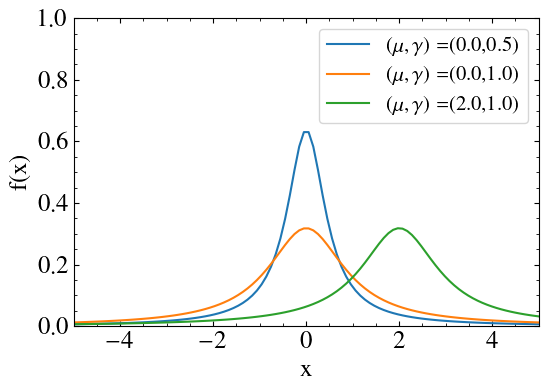

In [23]:

muvals = [0,0,2]
gammavals = [0.5,1,1]
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for m,g in zip(muvals,gammavals) :
    plotCauchy(m,g,ax,r'$(\mu,\gamma)=$(%.1f,%.1f)' % (m,g))
plt.legend(fontsize='small')
plt.savefig('ExampleCauchyDistribution.png',format='png')
plt.show()

$\mu$ is the centre

$2\gamma$ is the full-width-half-maximum (FWHM)

Doesn't have a mean or a variance!

The ratio of two independant standard normal distributions is Cauchy(0,1)

Examples in astronomy: Fitting spectral lines

# Binomial distribution




$X\sim \rm{Binom}(n,p)$ where $n$ is +ve integer, $0\leq p\leq1$

$ f(x ; n, p)=\frac{n!}{x!(n-x)!} p^{x}(1-p)^{n-x} $

$\mathrm{E}[X]=n p$

$\operatorname{Var}[X]=n p(1-p)$

![](./ExampleBinomialDistribution.png)



#### Note:

Probability of having $x_i$ positive results from $n$ experiments each of which has a probability $p$ of success (a series of **Bernoulli trials**).

Uses in astronomy: How many objects of a certain type (binaries, quasars, lithium rich giants...) can I expect in my sample of n objects?

In [27]:
def Binomial(n, p, x) :
    '''Give pmf of Binomial distribution with parameters n & p, evaluated at x'''
    f = np.zeros_like(x)
    f = scipy.special.binom(n, x) * p**x * (1.-p)**(n-x)
    return f



def plotBinomial(n,p,ax,label=None):
    '''Plot pmf of Binomial distribution with parameters n & p'''
    x = np.arange(0,n+1)
    plt.xlim(0,10)
    plt.ylim(0,0.4)
    if useScipy:
        ax.plot(x,scipy.stats.binom.pmf(x,n,p),'o',label=label)
    else:
        ax.plot(x, Binomial(n,p,x),'o',label=label)
    plt.ylabel(r'f($x_i$)')
    plt.xlabel(r'$x_i$')



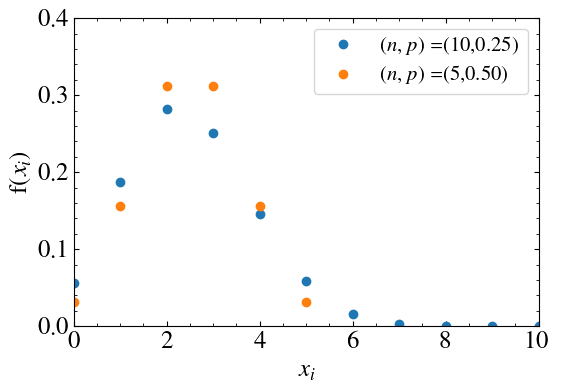

In [28]:

nvals = [10,5]
pvals = [0.25,0.5]
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for n,p in zip(nvals,pvals) :
    plotBinomial(n,p,ax,r'$(n,p)=$(%d,%.2f)' % (n,p))
plt.legend(fontsize='small')
plt.savefig('ExampleBinomialDistribution.png',format='png')
plt.show()

# Poisson distribution

$\begin{array}{l}{X \sim \operatorname{Pois}(\lambda) \text { where } \lambda \geq 0} \\ {f(x ; \lambda)=\exp (-\lambda) \frac{\lambda^{x}}{x !},} \\ {\mathrm{E}[X]=\lambda} \\ {\operatorname{Var}[X]=\lambda^2}\end{array}$

![](./ExamplePoissonDistribution.png)

Use in astronomy: What is the probability that I see x events of a certain type in a given timespan (where the average would be $\lambda$), e.g. supernovae.

Note that Pois$(\lambda)$ is the limiting form of Binom$(n, p)$ for $\lambda = np$ when $n\rightarrow\infty$ and $p\rightarrow0$ (see below)

In [29]:
def Poisson(lambda_in, x) :
    '''Give pmf of Poisson distribution with parameter lambdaIn, evaluated at x'''
    f = np.zeros_like(x)
    f = np.exp(-lambda_in) * lambda_in**x / scipy.special.factorial(x)
    return f



def plotPoisson(lambda_in,ax,label=None):
    '''Plot pmf of Poisson distribution with parameter lambdaIn'''
    x = np.arange(0,11)
    plt.xlim(0,10)
    plt.ylim(0,0.4)
    if useScipy:
        ax.plot(x,scipy.stats.poisson.pmf(x,lambda_in),'o',label=label)
    else:
        ax.plot(x, Poisson(lambda_in,x),'o',label=label)
    plt.ylabel('f(x)')
    plt.xlabel('x')


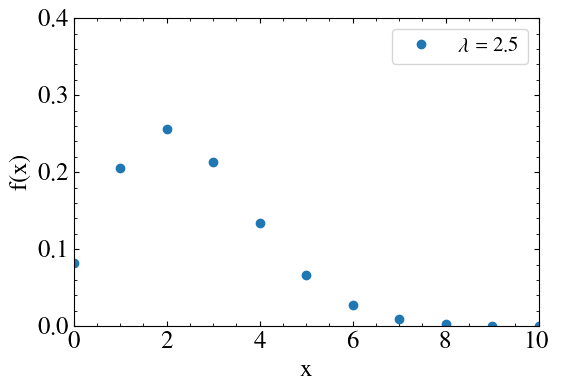

In [30]:

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plotPoisson(2.5,ax,r'$\lambda=2.5$')
plt.legend(fontsize='small')
plt.savefig('ExamplePoissonDistribution.png',format='png')
plt.show()

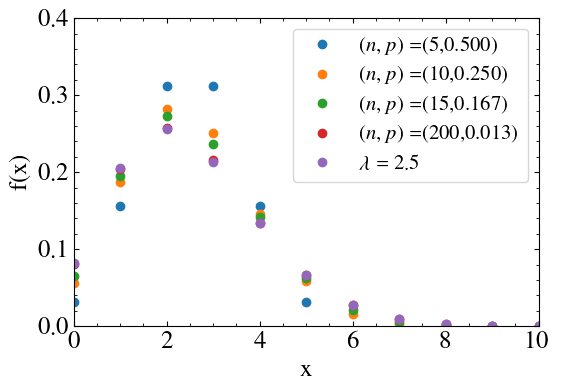

In [31]:

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

nvals = np.array([5,10,15,200])
pvals = 2.5/nvals

for n,p in zip(nvals,pvals) :
    plotBinomial(n,p,ax,r'$(n,p)=$(%d,%.3f)' % (n,p))
plotPoisson(2.5,ax,r'$\lambda=2.5$')
plt.legend(fontsize='small')
plt.show()